# MNIST Digit Recognizer

**Authors: Clement, Calvin, Tilova**

---

Welcome to the very first project of the **Tequila Chicas**! We will be classifying images of hand written numbers to their corresponding digits. This project follows the guidelines and uses the data set provide from the Kaggle Competition [here](https://www.kaggle.com/competitions/digit-recognizer/overview). 

## Introduction  

In this notebook we will be going over preliminary exploratory data analysis (EDA) of our MNIST dataset as well as a baseline model to get a sense of model accuracies. We will also use our baseline model to generate a prediction of the test set to submit on Kaggle 

<a id = 'toc'></a>
    
## Table of Contents
---
1. [Data Wrangling](#wrangle)
2. [Exploratory Data Analysis](#eda)\
    2.1 [Exploring the Images](#images)\
    2.2 [Digit Variation](#variation)\
    2.3 [Biggest Variation](#biggest)\
    2.4 [Class Distribution](#distribution)
3. [Baseline Modelling](#base)
4. [Generating Predictions](#predictions)
5. [Conclusion](#conclusion)

**Importing Libraries**

In [64]:
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Train_Test_Split
from sklearn.model_selection import train_test_split

# classification model
from sklearn.linear_model import LogisticRegression

# metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# ignores the filter warnings
import warnings
warnings.filterwarnings('ignore')

%autosave 300

Autosaving every 300 seconds


<a id = 'wrangle'></a>

### 1. Data Wrangling
---
Loading the test and train set CSVs files.

In [65]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')
df_train.shape, df_test.shape

((42000, 785), (28000, 784))

In [84]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [85]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [5]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Checking for null values in the dataframe.

In [6]:
df_train.isna().sum().sum()

0

Checking if there are any duplicates.

In [7]:
df_train.duplicated().sum()

0

Checking the data types of each column. To ensure they are appropriate for the data they represent.

In [8]:
df_train.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

Great it looks like we have no duplicates or missing values in the dataset. Let's look at some of the summary stats of the data.

In [9]:
df_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


The labels seem to be pretty evenly distributed since the mean and median are roughly in the middle of the range from 0-9. We should explore this further in the EDA by plotting out the distributions.

<a id = 'eda'></a>

### 2. Exploratory Data Analysis
---
<a id = 'images'></a>

#### 2.1 Exploring The Images

Since the label and pixels are in the same dataframe we will need to separate them into X (independent) and y (dependent) variables.

In [77]:
X = df_train.iloc[:, 1:]
y = df_train.iloc[:, 0]

# sanity check
print(X.shape, y.shape)

(42000, 784) (42000,)


**Important Notes**
- There are 42000 rows or images with 784 columns or (28 by 28) pixels. This means that the dataset is already flattened out for us.
- We will need to reshape the 1D row into a 2D row with the reshape function from numpy.

Using -1 as a dimension in the reshape() function automatically infers the size for that dimension based on the size of the original array and the other specified dimensions.

In [11]:
images = np.array(X).reshape(-1, 28, 28)

In [12]:
images.shape

(42000, 28, 28)

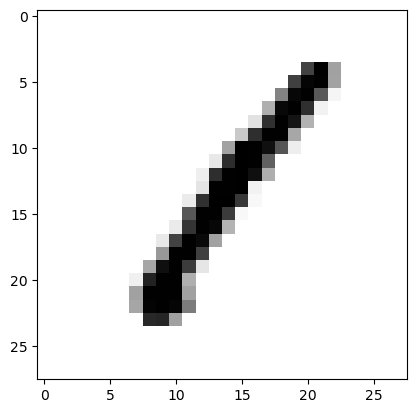

In [13]:
plt.figure()
plt.imshow(images[0], cmap="gray_r")   # plt.imshow() displays the data array as an image
plt.show()

For our first hand drawn image, this definitely looks like a 1. Next, we will iterate through the dataset and see what each class from 0-9 look like as images:
1. We can make a subplot of 10 figures
2. Create a For loop so that our labels (y) matches the 2D array.

**Code explanation**
- The range(10) generates values from 0 to 9
- The axes.ravel() flattens the 2D array of the image into a 1D array
- The zip() numpy function combines the two iterables where each iteration pairs a digit class with a subplot.

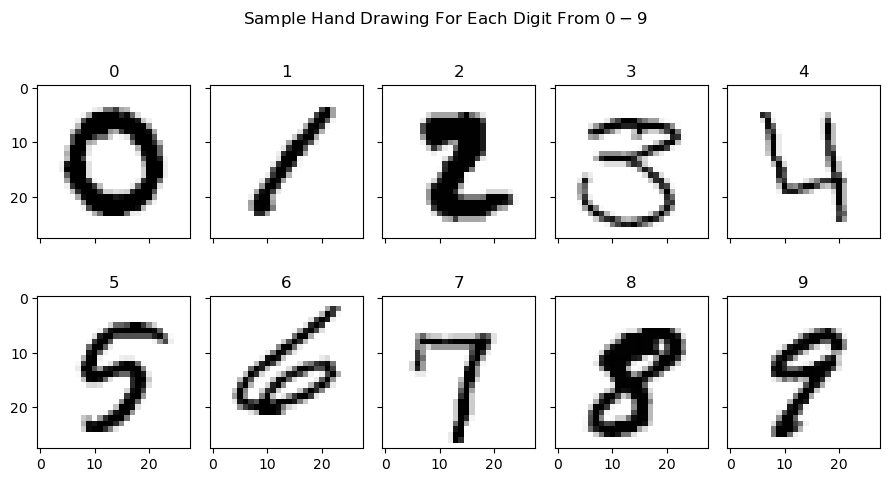

In [14]:
fig, axes = plt.subplots(2, 5, figsize=(9, 5), sharex=True, sharey=True)
for target, ax in zip(range(10), axes.ravel()):
    ax.imshow(images[y==target][0], cmap = 'gray_r')
    ax.set_title(target)

fig.suptitle("Sample hand drawing for each digit from $0-9$".title())
fig.tight_layout()
plt.show()

Wow some of these numbers are horribly drawn and will be difficult for even humans to read! Next we can use np.mean() to average out what the average hand drawn 0-9 would look like.

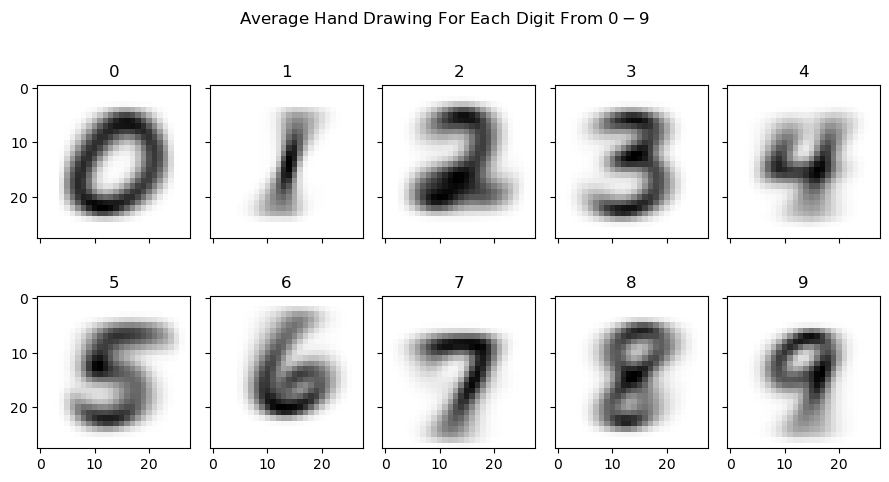

In [15]:
fig, axes = plt.subplots(2, 5, figsize=(9, 5), sharex=True, sharey=True)
for target, ax in zip(range(10), axes.ravel()):
    ax.imshow(np.mean(images[y==target], axis=0), cmap = 'gray_r')
    ax.set_title(target)
    
fig.suptitle("Average hand drawing for each digit from $0-9$".title())
fig.tight_layout()
plt.show()

**Findings**:
Once this is averaged out, we can see how most people in this dataset usually draws their digits. It's interesting to see that a lot of people draw a loop inside the `2`. For the digit number `1`, some people have the 1 slanted to the right and some have it slanted to the left.

We can also look at how much variability comes with each digit by looking at how they are distributed in a boxplot. 

<a id='variation'></a>
**2.2 Digit Variation**

Using the mean pixels for each digit we calculated above, we can see how much variability there is for each image pixel from its mean expected digit label. We do this by working with the flattened version of our images (i.e. having shape 784 instead of 28x28). For each image and its expected label mean, we calculate the euclidean distance. 

First we need to get the mean pixels again for each digit as we did above. We can do this using list comprehension to calculate the mean value of the images for each digit.

In [16]:
# Mean pixel values for each digit
mean_pixel = np.array([np.mean(X[y==target], axis=0) for target in range(10)])

# Checking for the proper shape
mean_pixel.shape

(10, 784)

Then we need to create a dataframe that contains the digit for each image and the euclidean norm of the image from its mean value of that digit. To calculate the Euclidean distance, we use `np.linalg.norm()` in the NumPy package by subtracting our image array with the mean image array. 

In [17]:
# Create a dictionary to store values that will be converted to a Pandas dataframe 
x = {'digit': [], 'norm': []}

# Loop over all the images in our training set and store the image class as well as its Euclidean norm
for image in range(len(X)):
    
    # Find image class
    y_class = y[image]
    
    # Store image class
    x['digit'].append(y_class)
    
    # Calculate and store Euclidean norm using np.linalg 
    x['norm'].append(np.linalg.norm(X.iloc[image] - mean_pixel[y_class]))

Now we can plot out our results using `seaborn`.

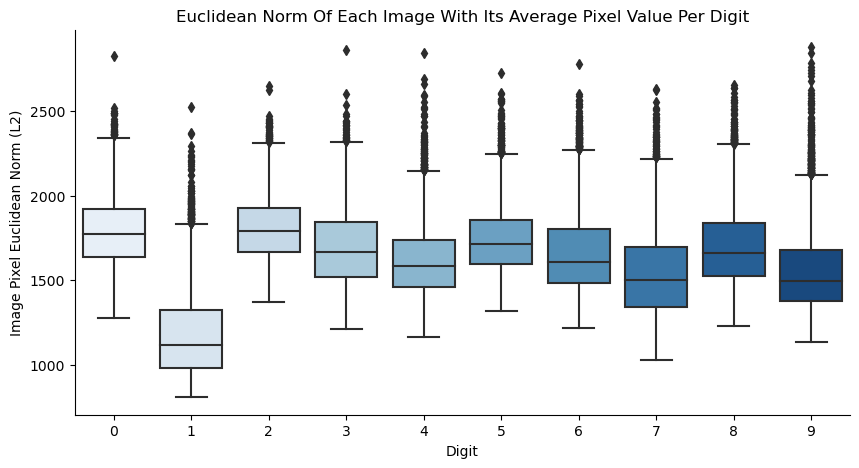

In [18]:
# Convert dictionary to dataframe
digit_spread = pd.DataFrame(x)

# Plot data as a boxplot
plt.figure(figsize=(10,5))
sns.boxplot(digit_spread, x='digit', y='norm', palette='Blues')
plt.title("Euclidean norm of each image with its average pixel value per digit".title())
plt.xlabel("Digit")
plt.ylabel("Image pixel euclidean norm (L2)".title())
sns.despine()
plt.show()

**Findings**:
Looking at our plot above, we see that a majority of the digits have relatively the same level of variation in the data set. Digit 1 overall has less variation in its pixel distance meaning it has less variability in how people write the digit 1. The most variation happens with digit 0 and digit 2. Notice how all digits have outliers, that is images that are very different from its average pixel values. 

<a id='biggest'></a>
**2.3 Biggest Variation**  

Let's look at the image from each class with the biggest difference in euclidean distances.  

In [19]:
# Check how values a displayed in our dataframe
digit_spread.head()

,digit,norm
0,1,1489.944236
1,0,1799.636117
2,1,1066.968260
3,4,1729.783236
4,0,1961.381124


We can use the `.groupby()` function to groupby our digits and then take the index with the highest norm for each digit class. 

In [54]:
# Groupby digit and take the index that has the highest norm value 
index = digit_spread.groupby('digit')['norm'].idxmax().values

index

array([ 8062, 27122, 40976, 11593, 31608, 35583, 15160, 12130,  3705,
       40354])

Since our indices follow the same ordering as our original training set, we can use them to plot out the images that have the highest norm in our calculation. 

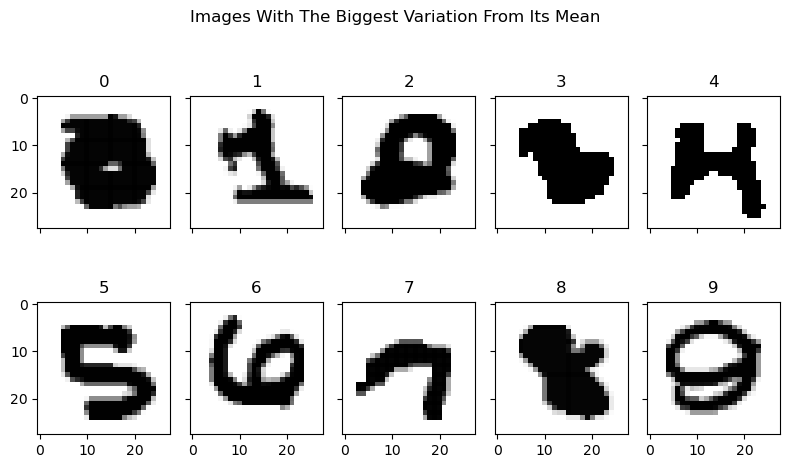

In [83]:
# Plot the images that have the biggest norm in our data set for each digit
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(8,5), sharex=True, sharey=True)

for i, ax in zip(range(len(index)), axes.ravel()):
    ax.imshow(images[index[i]], cmap='gray_r')
    ax.set_title(digit_spread['digit'].iloc[index[i]])
fig.suptitle("Images with the biggest variation from its mean".title())
fig.tight_layout()

**Insights**:
Looking at these images above we see that it is indeed really difficult to classify them into their respective classes. For example, the digit 0 almost does not look like a zero given the extra marking at the top of the number. Digit 3 also does not have the distinctive spaces in the middle making it hard to interpret. 

<a id='distribution'></a>
**2.4 Class Distribution**

Let's look at the distribution of our class labels to see if we have any major data imbalances. Our class labels range from $0$ to $9$.

>**Note**: Since this is multiclass classification, **we will always have data imbalance** since we are comparing one class to all the other classes at a time. 

We can look at the class distribution using `.value_counts()` and `.plot()` for Pandas dataframes. 

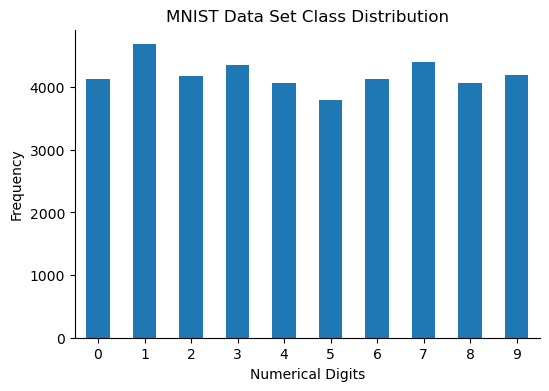

In [89]:
# Plotting our target label distribution frequency from our training data set
plt.figure(figsize=(6,4))
y.value_counts().sort_index(ascending=True).plot(kind='bar')
plt.title("MNIST Data Set Class Distribution")
plt.xlabel("Numerical Digits")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
sns.despine()
plt.show()

**Findings**:  
Looking at our class distribution above we see that each class seems to have a relatively similar number of appearances. Class 1 appears to have the highest overall frequency while class 5 appears to have the lowest. Note that class imbalance is still present because we are working with multiclass classification, meaning we are comparing one class label to the rest of the other labels at a time. 

<a id='base'></a>
### 3. Baseline Modelling

---
    
1. Create test and validation set with train_test_split
2. Fit basic Logistic Regression Model
3. Evaluate Metrics
4. Scaling

In [84]:
# Creating test and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, stratify=y)

In [69]:
X_train.shape, y_train.shape

((31500, 784), (31500,))

Making the pre-trained Logistic Regression model that will be used for making predictions.

In [70]:
base_logreg = LogisticRegression()
base_logreg.fit(X_train, y_train)

LogisticRegression()

In [71]:
print(f' Train_Accuracy: {base_logreg.score(X_train, y_train)}, Val_Accuracy: {base_logreg.score(X_val, y_val)}')

 Train_Accuracy: 0.9415873015873016, Val_Accuracy: 0.9144761904761904


With just the base logistic regression we are getting a very high train and validation accuracy with a small overfit in the training set. Let's look at a confusion matrix to measure how well our model is classifying each digit.

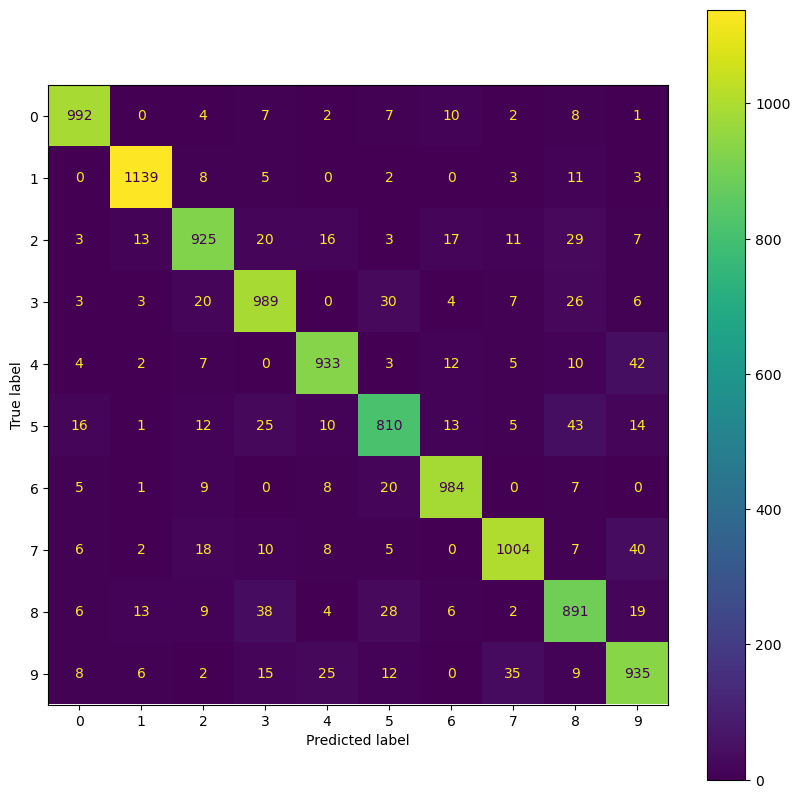

In [72]:
# Get predictions of validation set from model
y_pred = base_logreg.predict(X_val)

# Setup confusion matrix
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(10, 10))

# Displays the confusion matrix
cf_disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=base_logreg.classes_
)

cf_disp.plot(ax=plt.gca()) # .gca = get current axis as the axis
plt.show()

#### Classification Report
The classification report provides a detailed evaluation of the model's performance on each class, along with overall metrics.

In [73]:
base_report = classification_report(y_val, y_pred)
print(base_report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1033
           1       0.97      0.97      0.97      1171
           2       0.91      0.89      0.90      1044
           3       0.89      0.91      0.90      1088
           4       0.93      0.92      0.92      1018
           5       0.88      0.85      0.87       949
           6       0.94      0.95      0.95      1034
           7       0.93      0.91      0.92      1100
           8       0.86      0.88      0.87      1016
           9       0.88      0.89      0.88      1047

    accuracy                           0.91     10500
   macro avg       0.91      0.91      0.91     10500
weighted avg       0.91      0.91      0.91     10500



The overall accuracy of the model on the test set is 91%. With F1-scores ranging from 0.86 to 0.97, the model shows a balance between precision and recall for most classes.

#### Scaler

Let's use StandardScaler to scale our data. This scaler standardizes features by removing the mean and scaling to unit variance. It assumes that your data is normally distributed.

In [75]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Logistic regression model
base_logreg = LogisticRegression()
base_logreg.fit(X_train_scaled, y_train)

# Get predictions of validation set from model
y_pred = base_logreg.predict(X_val_scaled)

In [76]:
base_report = classification_report(y_val, y_pred)
print(base_report)

              precision    recall  f1-score   support

           0       0.95      0.97      0.95      1033
           1       0.95      0.97      0.96      1171
           2       0.89      0.88      0.88      1044
           3       0.88      0.87      0.88      1088
           4       0.91      0.92      0.91      1018
           5       0.85      0.88      0.86       949
           6       0.94      0.94      0.94      1034
           7       0.92      0.89      0.91      1100
           8       0.87      0.86      0.86      1016
           9       0.88      0.88      0.88      1047

    accuracy                           0.91     10500
   macro avg       0.90      0.90      0.90     10500
weighted avg       0.91      0.91      0.91     10500



It looks like scaling the data brought the scores down. It's not uncommon for scaling to affect model performance, especially with different datasets and algorithms. StandardScaler is sensitive to outliers, which might be a concern since the pixel values vary significantly.

Let's try MinMax Scaler. It helps keep the shape of the original distribution and is less sensitive to outliers compared to StandardScaler.

In [80]:
from sklearn.preprocessing import MinMaxScaler
# Feature scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Logistic regression model
base_logreg = LogisticRegression()
base_logreg.fit(X_train_scaled, y_train)

# Get predictions of validation set from model
y_pred = base_logreg.predict(X_val_scaled)

In [81]:
base_report = classification_report(y_val, y_pred)
print(base_report)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1033
           1       0.95      0.98      0.96      1171
           2       0.92      0.90      0.91      1044
           3       0.90      0.88      0.89      1088
           4       0.92      0.92      0.92      1018
           5       0.87      0.88      0.87       949
           6       0.95      0.96      0.95      1034
           7       0.92      0.94      0.93      1100
           8       0.90      0.87      0.88      1016
           9       0.89      0.89      0.89      1047

    accuracy                           0.92     10500
   macro avg       0.92      0.92      0.92     10500
weighted avg       0.92      0.92      0.92     10500



For MinMax Scaling, the scores only improved by 1%. We can look at other different strategies to improve the performance of our model. 

#### Decision Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

y_pred_train = decision_tree_model.predict(X_train)
y_pred_val = decision_tree_model.predict(X_val)

In [95]:
decision_tree_model.score(X_train, y_train)

1.0

In [96]:
decision_tree_model.score(X_val, y_val)

0.8553333333333333

In [91]:
print(f"Classification report:")
base_report = classification_report(y_val, y_pred_val)
print(base_report)

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1033
           1       0.92      0.94      0.93      1171
           2       0.82      0.82      0.82      1044
           3       0.81      0.82      0.81      1088
           4       0.87      0.86      0.86      1018
           5       0.78      0.79      0.78       949
           6       0.89      0.89      0.89      1034
           7       0.90      0.90      0.90      1100
           8       0.80      0.77      0.78      1016
           9       0.82      0.83      0.83      1047

    accuracy                           0.85     10500
   macro avg       0.85      0.85      0.85     10500
weighted avg       0.85      0.85      0.85     10500



Another decision tree optimizing max_depth

In [97]:
max_depth_list = [5, 10, 15, 20, 25]
train_score = []
test_score = []
for depth in max_depth_list:
    decision_tree_model = DecisionTreeClassifier(max_depth=depth)
    
    decision_tree_model.fit(X_train, y_train)
    
    train_score.append(decision_tree_model.score(X_train, y_train))
    test_score.append(decision_tree_model.score(X_val, y_val))

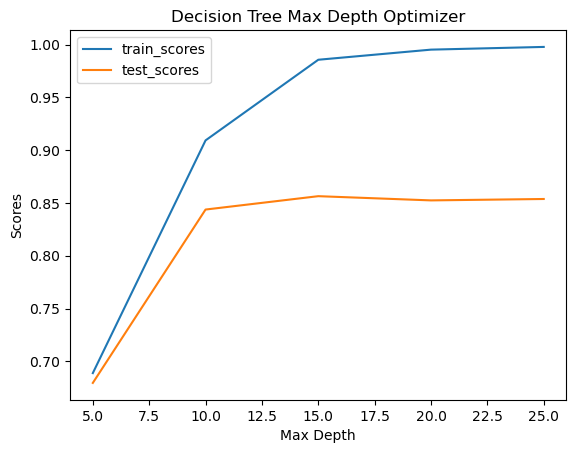

In [102]:
plt.figure()
plt.plot(max_depth_list, train_score, label='train_scores')
plt.plot(max_depth_list, test_score, label='test_scores')
plt.xlabel("Max Depth")
plt.ylabel("Scores")
plt.title("Decision Tree Max Depth Optimizer")
plt.legend()
plt.show()

In [103]:
max_depth_list = [8, 9, 10, 11, 12]
train_score = []
test_score = []
for depth in max_depth_list:
    decision_tree_model = DecisionTreeClassifier(max_depth=depth)
    
    decision_tree_model.fit(X_train, y_train)
    
    train_score.append(decision_tree_model.score(X_train, y_train))
    test_score.append(decision_tree_model.score(X_val, y_val))

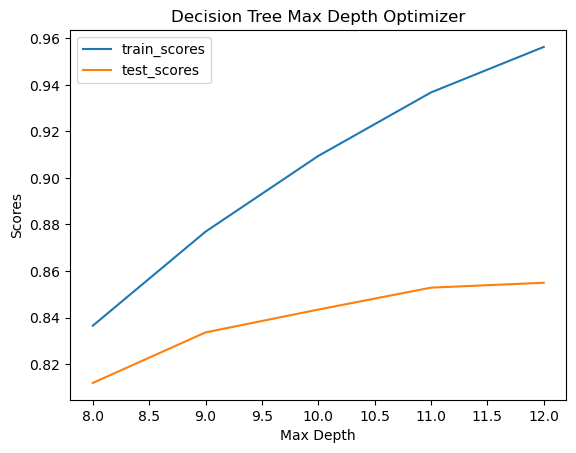

In [104]:
plt.figure()
plt.plot(max_depth_list, train_score, label='train_scores')
plt.plot(max_depth_list, test_score, label='test_scores')
plt.xlabel("Max Depth")
plt.ylabel("Scores")
plt.title("Decision Tree Max Depth Optimizer")
plt.legend()
plt.show()

In [106]:
from sklearn.metrics import accuracy_score
max_depth_values = [7, 8, 9, 10, 11, 12]

best_accuracy = 0
best_max_depth = None

# Iterate through each max_depth value
for depth in max_depth_values:
    decision_tree_model = DecisionTreeClassifier(max_depth=depth)
    
    decision_tree_model.fit(X_train, y_train)
    
    y_pred_val = decision_tree_model.predict(X_val)
    
    accuracy = accuracy_score(y_val, y_pred_val)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_max_depth = depth

final_model = DecisionTreeClassifier(max_depth=best_max_depth)
final_model.fit(X_train, y_train)

y_pred_train = final_model.predict(X_train)
y_pred_val = final_model.predict(X_val)

In [107]:
decision_tree_model.score(X_train, y_train)

0.9563492063492064

In [108]:
decision_tree_model.score(X_val, y_val)

0.8550476190476191

#### SVM 

<a id='predictions'></a>

### 4. Generating Predictions for Test Set using Logistic Regression
---

In this process, we aim to generate predictions for the test set using our baseline model along with the test_data.csv file and our logistic regression model. This will allow us to evaluate the model's effectiveness in making accurate predictions on unseen data.

In [96]:
df_test.shape 

(28000, 784)

We initialize an index range starting from 1 up to the number of rows in df_test, representing the image IDs for our predictions.

In [97]:
index = range(1, df_test.shape[0] + 1)

We create a new DataFrame logreg_prediction containing the predicted labels generated by the logistic regression model `base_logreg` for the test data `df_test`. We assign 'ImageId' to the index column, so that it represents the IDs of the images.

In [98]:
logreg_prediction = pd.DataFrame({'Label':base_logreg.predict(df_test)}, index=index)
logreg_prediction.index.name = 'ImageId'

In [99]:
logreg_prediction

,Label
ImageId,
1,2
2,0
3,9
4,7
5,3
...,...
27996,9
27997,7
27998,3


We've succesfully created our prediction DataFrame, now we can save this as a csv to submit and receive our score.

In [30]:
logreg_prediction.to_csv('../logreg_prediction.csv')

After submission, we received a score of 0.91617!

<a id='conclusion'></a>
### 5. Conclusion

From our Logistic Regression baseline model, we can conclude that accuracy scores can be pretty high for this data set given that our baseline accuracy is at $91\%$. Next, we will create a model using Support Vector Machines (SVMs) as well as a simple neural network using PyTorch. 

### References

- [Kaggle Digit Recognizer Submissions](https://www.kaggle.com/competitions/digit-recognizer/submissions)